# DataCamp - Data Scientist Career Track (Python)

##    Manipulating Time Series Data in Python          



In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Manipulating Time Series Data in Python/"

##    CHAPTER 1  - Working with Time Series in Pandas


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

#### Exercício 1 - How to use dates & times with pandas

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-03-26 00:00:00
2019
Tuesday
1
2019-03
2019-05
DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')
2017-01-31 00:00:00
DatetimeIndex(['2017-01-31', '2017-02-28'], dtype='datetime64[ns]', freq='M')
PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
data    12 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 176.0 bytes
None


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  del sys.path[0]


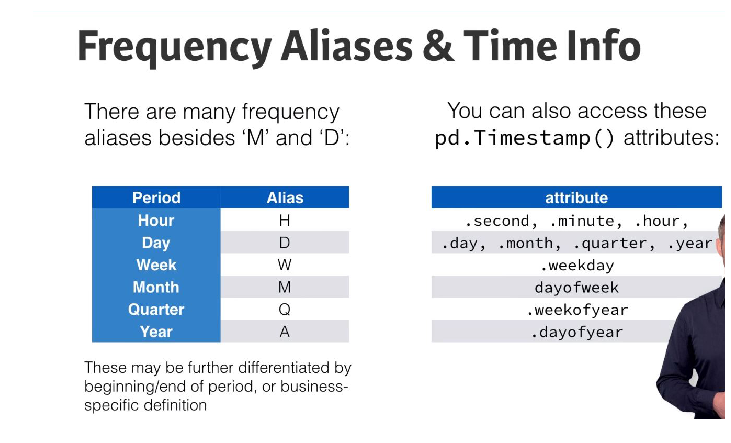

,0,1
2017-01-31,0.703034,0.413833
2017-02-28,0.677210,0.983745
2017-03-31,0.925639,0.585939
2017-04-30,0.699624,0.141211
2017-05-31,0.995894,0.665600
2017-06-30,0.883298,0.906119
2017-07-31,0.743149,0.297995
2017-08-31,0.776337,0.801567
2017-09-30,0.138701,0.293475
2017-10-31,0.917881,0.170462


In [3]:
#vídeo
import pandas as pd
from datetime import datetime # to manually create dates

# ---- Basic building block: pd.Timestamp

time_stamp = pd.Timestamp(datetime(2019, 3, 26)) # understands dates as strings

print(type(time_stamp)) #pandas._libs.tslibs.timestamps.Timestamp
print(time_stamp)  # Timestamp('2019-03-26 00:00:00')

print(time_stamp.year) #timestamp object has many attributes to store time-specific information
print(time_stamp.weekday_name) # Tuesday
print(time_stamp.dayofweek)    # 1 -->terça



# ---- More building blocks: pd.Period & freq

period = pd.Period('2019-03')
print(period)  # Period('2019-03', 'M')  ---> Period object has freq attribute to store frequency info

# Convert to daily 
period.asfreq('D') # Period('2019-03-31', 'D')

# Convert pd.Period() to pd.Timestamp() and back
period.to_timestamp().to_period('M')  # Period('2019-03', 'M')

# Frequency info enables basic date arithmetic
print(period + 2) # Period('2019-05', 'M') 

# Timestamp tb tem
pd.Timestamp(datetime(2019, 3, 26), 'M') + 1   # Timestamp('2019-03-31 00:00:00', freq='M')  , mesmo que fazer
pd.Timestamp('2019, 3, 26', 'M') + 1           # Timestamp('2019-03-31 00:00:00', freq='M')


print("==========================================================================")

# ---- Sequences of Dates & Times

index = pd.date_range(start='2017-1-1', periods=12, freq='M')        # pd.date_range: start, end, periods, freq
print(index)                                                         # o default é daily frequency

# pd.DateTimeIndex: sequence of Timestamp objects with frequency info

print(index[0])
print(index[0:2])
print("==========================================================================")

print(index.to_period())

print("==========================================================================")

# --- Create a Time Series: pd.DateTimeIndex

print(pd.DataFrame({'data': index}).info())

print("==========================================================================")

import numpy as np
data = np.random.random((12, 2)) # random number generator, size=12 and 2 columns

# Create the dataframe with the index and data created
df = pd.DataFrame(data=data, index=index)


# ---- Frequency Aliases & Time Info ---> the most important ones

image = plt.imread(data_folder + "frequency_aliases_and_time_info.JPG")

plt.imshow(image)
plt.axis('off')
plt.subplots_adjust(left=0, bottom=-0.5, right=1.6, top=1, wspace=0, hspace=0)
plt.show()


# visualize df
df


Exercício 2

In [60]:
# Your first time series

# Create the range of dates here
seven_days = pd.date_range('2017-01-01', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


#### Exercício 3 - Indexing and resampling time series

             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10


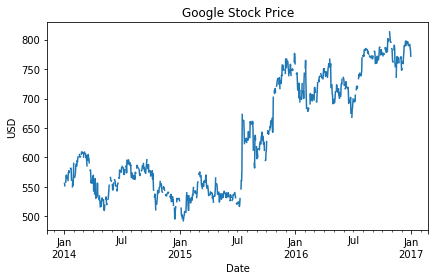

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB
             Close
Date              
2014-01-02  556.00
2014-01-03  551.95
2014-01-04     NaN
2014-01-05     NaN
2014-01-06  558.10


,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [5]:
#vídeo

google = pd.read_csv(data_folder + "google.csv")
google.head()

# Convert to datetime64
google['Date'] = pd.to_datetime(google['Date'])

# and set the dates column to index
google.set_index('Date', inplace=True)  #inplace: don't create copy

# head
print(google.head())
print("==========================================================")

# Plot
google['Close'].plot(title='Google Stock Price')
plt.tight_layout()
plt.ylabel("USD")
plt.show()
print("==========================================================")

# Partial String Indexing
google['2015'].info()             # Pass string for part of Date
print("==========================================================")
google['2015-3':'2016-2'].info()  # slice includes last month
print("==========================================================")

# Select a specific stock price
google.loc['2016-6-1', 'Close']

# Set frequency
google.asfreq('D').info()   # set calendar day frequency ---> convert DateTimeIndex to calendar day frequency

# Upsampling: higher frequency implies new dates => vão aparecer NaN's
print(google.asfreq('D').head() )
print("==========================================================")

# convert to business day frequency
google = google.asfreq('B')
google.head()  # aqui já não vão aparecer os NaN's de há bocado porque eram dias de fim de semana

In [6]:
# check the missing values:
google[google['Close'].isnull()].head()    # são dias em que o mercado estava fechado

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN


Exercício 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


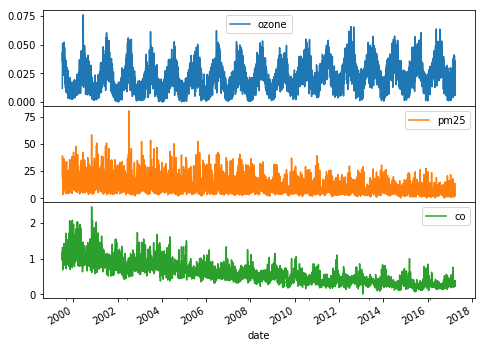

In [7]:
# Create a time series of air quality data

data = pd.read_csv(data_folder + "nyc.csv")

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.subplots_adjust(left=0, bottom=-0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 5

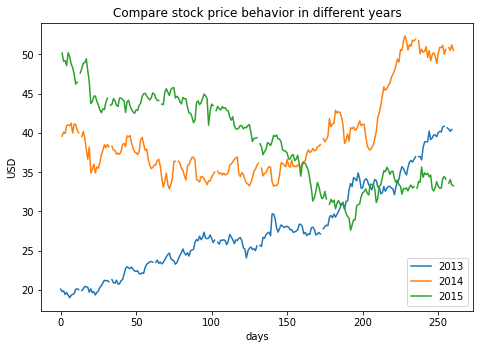

In [8]:
# Compare annual stock price trends

yahoo = pd.read_csv(data_folder + "yahoo.csv")
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
#####################

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.title("Compare stock price behavior in different years")
plt.xlabel("days")
plt.ylabel("USD")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 6

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


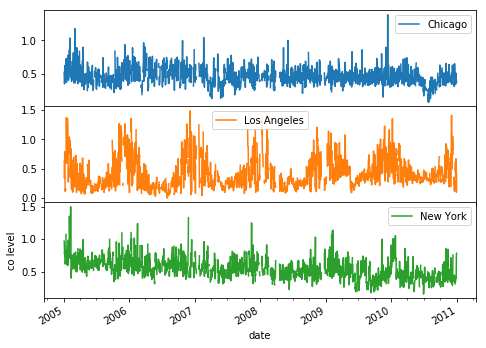

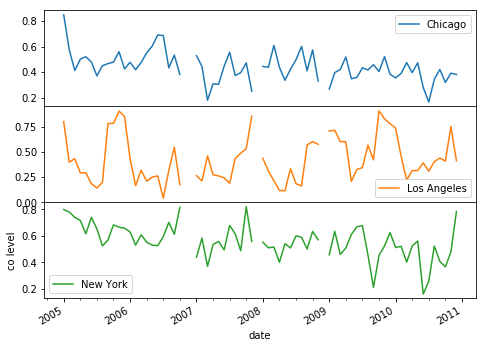

In [9]:
# Set and change time series frequency

co = pd.read_csv(data_folder + "co_cities.csv")
co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)
######################################################################

# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
# plt.title("Daily carbon monoxide concentration")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.ylabel("co level")
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
# plt.title("Monthly carbon monoxide concentration")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.ylabel("co level")
plt.show()

#### Exercício 7 - Lags, changes and returns for stock price series

In [10]:
#vídeo

# Basic Time Series Calculations

# Typical Time Series manipulations include:
#  Shift or lag values back or forward back in time
#  Get the difference in value for a given time period
#  Compute the percent change over any number of periods

# pandas buil-in methods rely on pd.DateTimeIndex
google = pd.read_csv(data_folder + "google.csv", parse_dates=['Date'], index_col='Date') #mais rápido


# .shift() : Moving data between past & future  

google['shifted'] = google['Close'].shift()           # moving into the future (default periods=1)

google['lagged'] = google['Close'].shift(periods=-1)  # moving into the past

print(google.head())
print("==========================================================")


# Calculate one-period percent change
google['change'] = google['Close'].div(google.shifted)  # divide o preço do período pelo do período passado
print(google.head())
print("==========================================================")


# calculate return
google['return'] = google.change.sub(1)*100
print(google.head())
print("==========================================================")


# .diff() & .pct_change(): built-in time-series change
google['diff'] = google['Close'].diff()

google['pct_change'] = google['Close'].pct_change()*100

print(google[['Close', 'diff', 'pct_change']].head())
print("==========================================================")

# Looking ahead: Get multi-period returns
google['return_3dias'] = google['Close'].pct_change(3)*100
google[['Close', 'return_3dias']].head()




             Close  shifted  lagged
Date                               
2014-01-02  556.00      NaN  551.95
2014-01-03  551.95   556.00     NaN
2014-01-04     NaN   551.95     NaN
2014-01-05     NaN      NaN  558.10
2014-01-06  558.10      NaN  568.86
             Close  shifted  lagged    change
Date                                         
2014-01-02  556.00      NaN  551.95       NaN
2014-01-03  551.95   556.00     NaN  0.992716
2014-01-04     NaN   551.95     NaN       NaN
2014-01-05     NaN      NaN  558.10       NaN
2014-01-06  558.10      NaN  568.86       NaN
             Close  shifted  lagged    change    return
Date                                                   
2014-01-02  556.00      NaN  551.95       NaN       NaN
2014-01-03  551.95   556.00     NaN  0.992716 -0.728417
2014-01-04     NaN   551.95     NaN       NaN       NaN
2014-01-05     NaN      NaN  558.10       NaN       NaN
2014-01-06  558.10      NaN  568.86       NaN       NaN
             Close  diff  pct_chan

,Close,return_3dias
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,-0.728417
2014-01-06,558.10,1.114231


Exercício 8

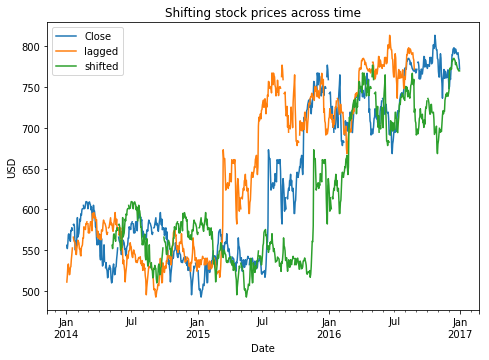

In [11]:
# Shifting stock prices across time

# Import data here
google = pd.read_csv(data_folder + 'google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(90)

# Plot the google price series
google.plot()
plt.title("Shifting stock prices across time")
plt.ylabel("USD")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 9

In [12]:
# Calculating stock price changes

# yahoo data in business days
yahoo = pd.read_csv(data_folder + "yahoo.csv", index_col='date', parse_dates=True)
yahoo = yahoo.asfreq('B')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo['price'].shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'].sub(yahoo['shifted_30'])

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

print("======================================================")
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


Exercício 10

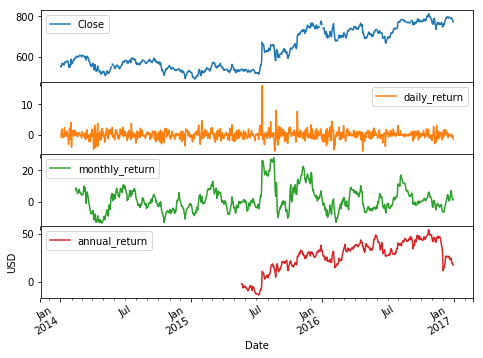

In [13]:
# Plotting multi-period returns

google = pd.read_csv(data_folder + 'google.csv', index_col='Date', parse_dates=True)
google = google.asfreq('B')

# Create daily_return
google['daily_return'] = google['Close'].pct_change(1)*100

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(30)*100

# Create annual_return
google['annual_return'] = google['Close'].pct_change(360)*100

# Plot the result
google.plot(subplots=True)
plt.ylabel("USD")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# CHAPTER 2 - Basic Time Series Metrics & Resampling


#### Exercício 1 - Compare time series growth rates

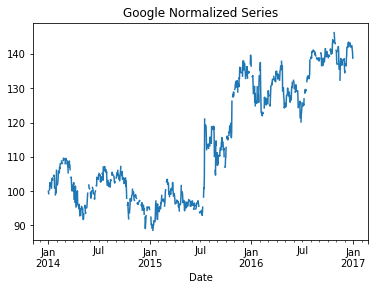

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
benchmark    1761 non-null float64
dtypes: float64(1)
memory usage: 27.5 KB


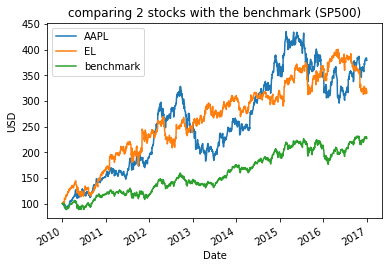

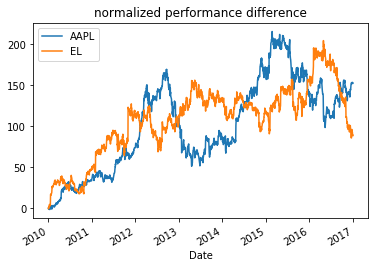

In [14]:
#vídeo

# Normalizing a Single Series (1)
google = pd.read_csv(data_folder + 'google.csv', index_col='Date', parse_dates=True)

# getting the first data point
first_price = google['Close'].iloc[0]

# divide each data point by first_price in order to normalize the data
normalized = google['Close'].div(first_price).mul(100)

#plot
normalized.plot(title="Google Normalized Series")  #starts at 100
plt.show()


# Normalizing multiple series (2)
prices = pd.read_csv(data_folder + "stock_data.csv", index_col='Date', parse_dates=True)  # vou usar outro ficheiro

normalized = prices.div(prices.iloc[0])  # pandas divide em cada coluna, faz corretamente
normalized.head()                        # automatic alignment of Series Index & DataFrame columns

# Comparing with a Benchmark (1)
index = pd.read_csv(data_folder + "index.csv", index_col='Date', parse_dates=True)
index.columns = ['benchmark']
index.info()

prices = pd.concat([prices, index], axis=1).dropna()   # juntar prices e index

# Comparing with a Benchmark (2)
normalized = prices.div(prices.iloc[0]).mul(100)

normalized[['AAPL', 'EL', 'benchmark']].plot()
plt.title("comparing 2 stocks with the benchmark (SP500)")
plt.ylabel("USD")
plt.show()

print("===============================================================")

# Plotting performance difference
diff = normalized[['AAPL', 'EL']].sub(normalized['benchmark'], axis=0).plot(title="normalized performance difference")

Exercício 2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


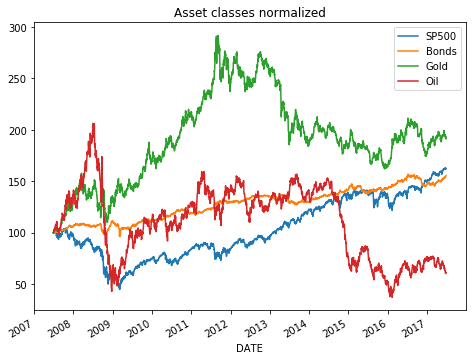

In [15]:
# Compare the performance of several asset classes

# Import data
prices = pd.read_csv(data_folder + "asset_classes.csv", index_col=0, parse_dates=True)

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices)*100

# Plot normalized
normalized.plot(title='Asset classes normalized')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 3

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


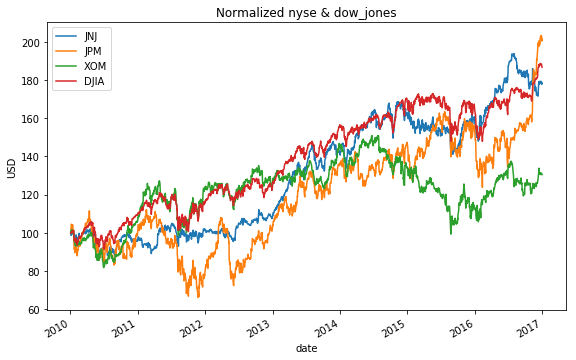

In [16]:
# Comparing stock prices with a benchmark

# Import stock prices and index here
stocks = pd.read_csv(data_folder + 'nyse.csv', index_col='date', parse_dates=True)
dow_jones = pd.read_csv(data_folder + 'dow_jones.csv', index_col='date', parse_dates=True)    # benchmark

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.title("Normalized nyse & dow_jones")
plt.ylabel("USD")
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

Exercício 4

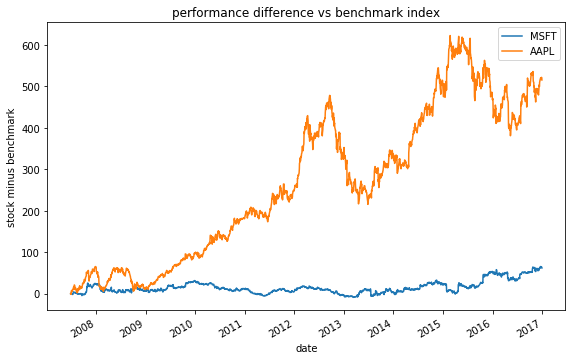

In [17]:
# Plot performance difference vs benchmark index

# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv(data_folder + 'msft_aapl.csv', index_col='date', parse_dates=True)

# Import index here
sp500 = pd.read_csv(data_folder + 'sp500.csv', index_col='date', parse_dates=True)

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.title("performance difference vs benchmark index")
plt.ylabel("stock minus benchmark")
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 5 - Changing the time series frequency: resampling

In [18]:
#vídeo

# pandas API:
# .asfreq()
# .reindex()
# .resample() + transformation method

# Quarterly Data
dates = pd.date_range('2016', periods=4, freq='Q')
data = range(1, 5)

quarterly = pd.Series(data=data, index=dates)
print(quarterly)
print("==============================")

# Upsampling: Quarter --> Month
monthly = quarterly.asfreq('M')

# convert to dataframe
monthly = monthly.to_frame('baseline')  

# 3 ways to fill the missing values, 'ffill' & 'bfill', 'value' where a value is provided:
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['value'] = quarterly.asfreq('M', fill_value=0)


# Add missing months: .reindex() --- igual
dates = pd.date_range('2016', periods=12, freq='M')
new_quarterly = quarterly.reindex(dates)

print(new_quarterly)

monthly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64
2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64


,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


Exercício 6

In [19]:
# Convert monthly to weekly data

# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)
print("=============================================================")

# Create weekly_dates here
weekly_dates = pd.date_range(start, end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


Exercício 7

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


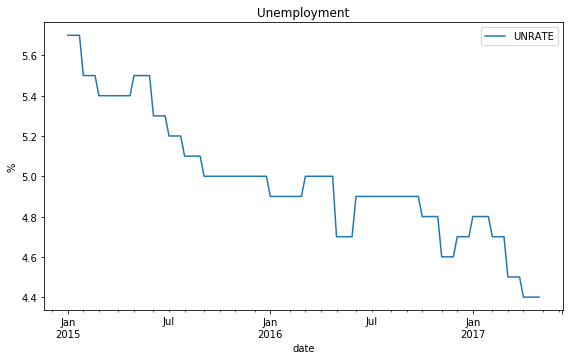

In [20]:
# Create weekly from monthly unemployment data

# Import data here
data = pd.read_csv(data_folder + 'unrate_2000.csv', index_col='date', parse_dates=True)

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.ylabel("%")
plt.title("Unemployment")
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 8 - Upsampling & interpolation with '.resample()'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Freq: MS
Data columns (total 1 columns):
UNRATE    209 non-null float64
dtypes: float64(1)
memory usage: 3.3 KB
            gdp_growth_ffill
date                        
2007-01-01               0.2
2007-02-01               0.2
2007-03-01               0.2
2007-04-01               3.1
2007-05-01               3.1
            gdp_growth_inter
date                        
2007-01-01          0.200000
2007-02-01          1.166667
2007-03-01          2.133333
2007-04-01          3.100000
2007-05-01          2.966667


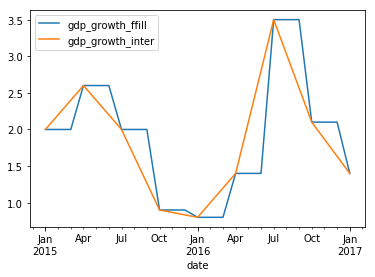

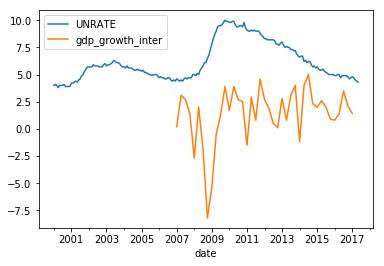

In [21]:
#vídeo

unrate = pd.read_csv(data_folder + 'unrate_2000.csv', index_col='date', parse_dates=True)

# 'M' --> month end
# 'MS' --> month start
# 'BM' --> business month end
# 'BMS' --> business month start

unrate.asfreq('MS').info()

unrate.resample('MS')  # create Resampler object

unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())  # True

# Quarterly Real GDP Growth
gdp = pd.read_csv(data_folder + "gdp_growth.csv", index_col=0, parse_dates=True)  # weekly data

# Interpolate Monthly Real GDP Growth
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill')
print(gdp_1.head())

gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter')   # find points on straight line between existing data
print(gdp_2.head())

# Plot Interpolated Real GDP Growth
pd.concat([gdp_1, gdp_2], axis=1).loc['2015':].plot()

# Combine GDP growth & Unemployment
pd.concat([unrate, gdp_2], axis=1).plot()
plt.show()

Exercício 9

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None


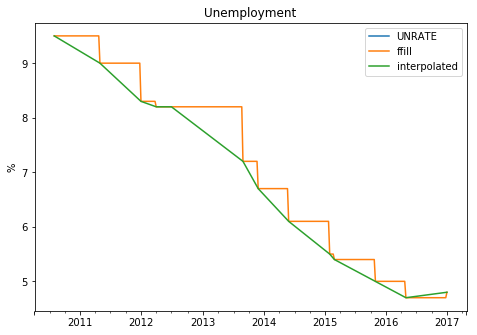

In [22]:
# Use interpolation to create weekly employment data

monthly = pd.read_csv(data_folder + 'unrate.csv', index_col='DATE', parse_dates=True)

# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly['UNRATE'].ffill()
weekly['interpolated'] = weekly['UNRATE'].interpolate()

# Plot weekly
weekly.plot()
plt.ylabel("%")
plt.title("Unemployment")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 10

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


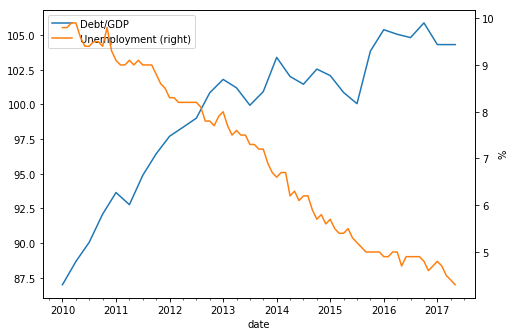

,Debt/GDP,Unemployment
date,,
2010-01-01,87.003860,9.8
2010-02-01,87.559397,9.8
2010-03-01,88.114933,9.9
2010-04-01,88.670470,9.9
2010-05-01,89.135103,9.6


In [23]:
# Interpolate debt/GDP and compare to unemployment

# Import & inspect data here
data = pd.read_csv(data_folder + 'debt_unemployment.csv', index_col='date', parse_dates=True)
print(data.info())
print("=======================================================")

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())
print("=======================================================")

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.ylabel("%")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

interpolated.head()

#### Exercício 11 - Downsampling & aggregation

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
               Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409


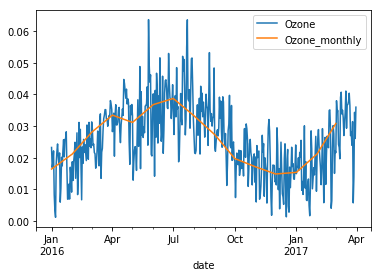

In [24]:
#vídeo

# Air quality: Daily Ozone Levels
ozone_nyc = pd.read_csv(data_folder + "ozone_nyc.csv", index_col=0, parse_dates=True)

ozone_nyc = ozone_nyc.resample('D').asfreq()
ozone_nyc.info()
print("=======================================================")

# creating monthly ozone data
ozone_nyc.resample('M').mean().head()

# you can add more
print(ozone_nyc.resample('M').agg(['mean', 'std']).head())

print("=======================================================")

# Plotting Resample Ozone Data
ozone_nyc_2016 = ozone_nyc['2016':]

ax = ozone_nyc_2016.plot()
monthly = ozone_nyc_2016.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax) 
plt.show()                         # ax=ax --> Matplotlib let's you plot again on the axes object returned by the 1st plot
print("=======================================================")

# Resampling Multiple Time Series

#...

Exercício 12

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB


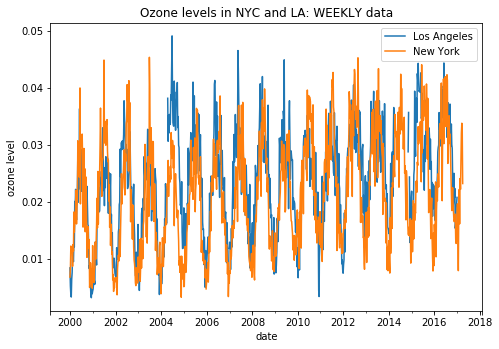

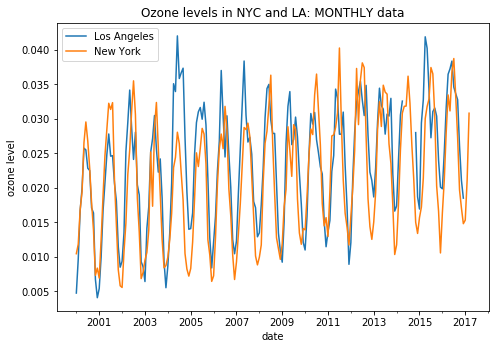

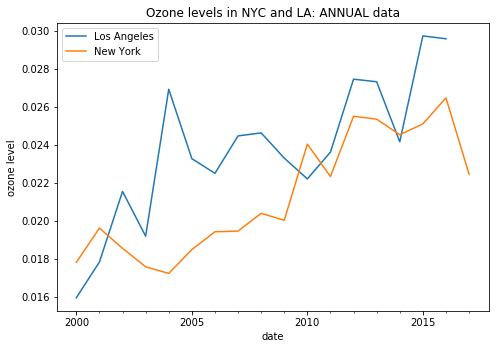

In [25]:
# Compare weekly, monthly and annual ozone trends for NYC & LA

# Import and inspect data here
ozone = pd.read_csv(data_folder + "ozone_nyla.csv", index_col='date', parse_dates=True)
ozone.info()

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.ylabel("ozone level")
plt.title("Ozone levels in NYC and LA: WEEKLY data")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.ylabel("ozone level")
plt.title("Ozone levels in NYC and LA: MONTHLY data")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.ylabel("ozone level")
plt.title("Ozone levels in NYC and LA: ANNUAL data")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 13

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


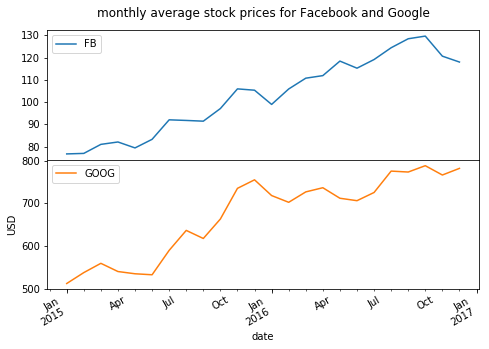

In [26]:
# Compare monthly average stock prices for Facebook and Google

# Import and inspect data here
stocks = pd.read_csv(data_folder + 'goog_fb.csv', index_col='date', parse_dates=True)
print(stocks.info())
print("=======================================================")

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()

monthly_average.plot(subplots=True)
plt.ylabel("USD")
plt.suptitle('monthly average stock prices for Facebook and Google')
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9, wspace=0, hspace=0)
plt.show()

Exercício 14

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB


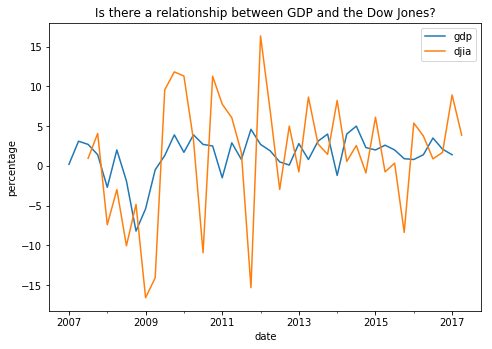

In [27]:
# Compare quarterly GDP growth rate and stock returns

# Import and inspect gdp_growth here
gdp_growth = pd.read_csv(data_folder + 'gdp_growth.csv', index_col='date', parse_dates=True)
gdp_growth.info()
print("=======================================================")

# Import and inspect djia here
djia = pd.read_csv(data_folder + 'djia.csv', index_col='date', parse_dates=True)
djia.info()
print("=======================================================")

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()
plt.ylabel("percentage")
plt.title("Is there a relationship between GDP and the Dow Jones?")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 15

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
SP500    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB


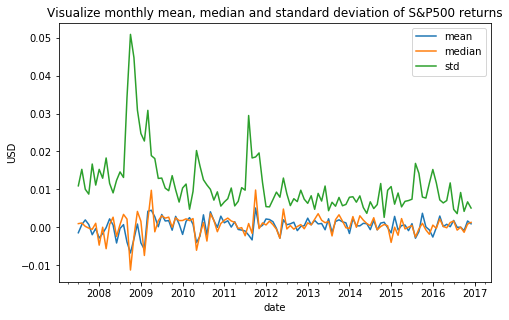

In [28]:
# Visualize monthly mean, median and standard deviation of S&P500 returns

# Import data here
sp500 = pd.read_csv(data_folder + 'sp500.csv', index_col='date', parse_dates=True)
sp500.info()
print("====================================================================")

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.ylabel("USD")
plt.title('Visualize monthly mean, median and standard deviation of S&P500 returns')
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9, wspace=0, hspace=0)
plt.show()

# Chapter 3 - Window Functions: Rolling & Expanding Metrics

#### Exercício 1 - Rolling window functions with pandas

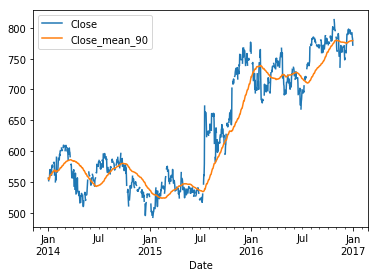

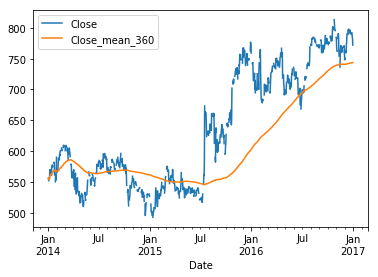

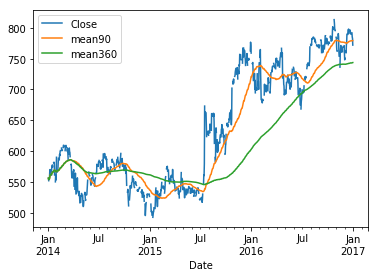

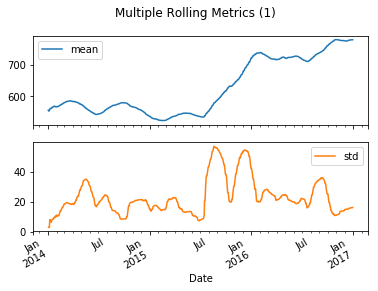

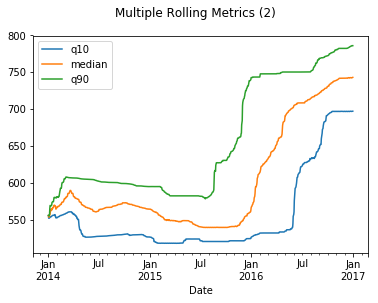

In [29]:
#vídeo

google = pd.read_csv(data_folder + "google.csv", index_col='Date', parse_dates=True)

# Calculating a rolling average (moving)
google.rolling(window=30).mean()  # fixed 
google.rolling(window='30D').mean() # fixed period length  --- 30D: calendar days

# 90 & 360 Day Rolling Mean
r90 = google.rolling(window='90D').mean()
r360 = google.rolling(window='360D').mean()

# concatenate Series or DataFrame along axis=1 (join)
google.join(r90.add_suffix('_mean_90')).plot()
google.join(r360.add_suffix('_mean_360')).plot()

# both
google['mean90'] = r90
google['mean360'] = r360
google.plot()
plt.show()

print("==========================================================")

# Multiple Rolling Metrics (1)
r = google['Close'].rolling('90D').agg(['mean', 'std'])
r.plot(subplots=True)
plt.suptitle("Multiple Rolling Metrics (1)")
plt.show()

# Multiple Rolling Metrics (2)
rolling = google['Close'].rolling('360D')
q10 = rolling.quantile(0.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90 = rolling.quantile(0.9).to_frame('q90')
pd.concat([q10, median, q90], axis=1).plot()
plt.suptitle("Multiple Rolling Metrics (2)")
plt.show()

Exercício 2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


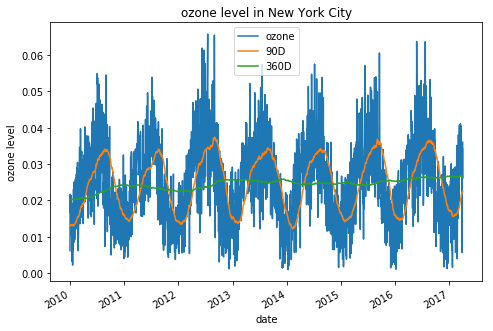

In [30]:
# Rolling average air quality since 2010 for new york city

# Import and inspect ozone data here
data = pd.read_csv(data_folder + 'nyc.csv', index_col='date', parse_dates=True)
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data['ozone'].rolling('90D').mean()
data['360D'] = data['ozone'].rolling(window='360D').mean()

# Plot data
data[['ozone', '90D', '360D']].loc['2010':].plot()
plt.ylabel("ozone level")
plt.title("ozone level in New York City")
plt.subplots_adjust(left=0, bottom=0, right=1, top=0.9, wspace=0, hspace=0)
plt.show()

Exercício 3

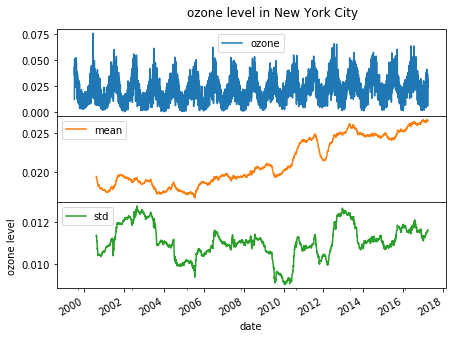

In [31]:
# Rolling 360-day median & std. deviation for nyc ozone data since 2000

# Import and inspect ozone data here
data = pd.read_csv(data_folder + 'nyc.csv', index_col='date', parse_dates=True).dropna()

# Calculate the rolling mean and std here
rolling_stats = data['ozone'].rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
# stats = data.join(rolling_stats)   não usei pq não dá com Series, filtrando data['ozone']
stats = pd.concat([data['ozone'], rolling_stats], axis=1)

# Plot stats
stats.plot(subplots=True)
plt.ylabel("ozone level")
plt.suptitle("ozone level in New York City")
plt.subplots_adjust(left=0, bottom=0, right=0.9, top=0.9, wspace=0, hspace=0)
plt.show()

Exercício 4

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB


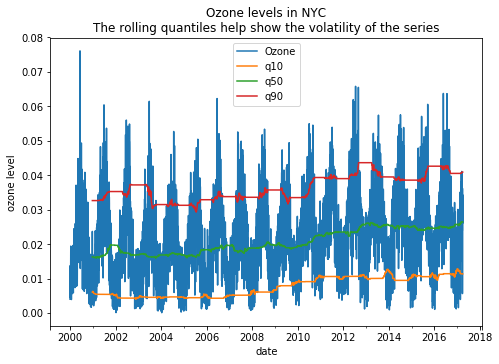

In [32]:
# Rolling quantiles for daily air quality in nyc

data = pd.read_csv(data_folder + "ozone_nyc.csv", index_col=0, parse_dates=True)

# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data['Ozone'].rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.10)
data['q50'] = rolling.quantile(.50)
data['q90'] = rolling.quantile(.90)

# Plot monthly returns
data.plot()
plt.ylabel("ozone level")
plt.title("Ozone levels in NYC\nThe rolling quantiles help show the volatility of the series")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 5 - Expanding window functions with pandas

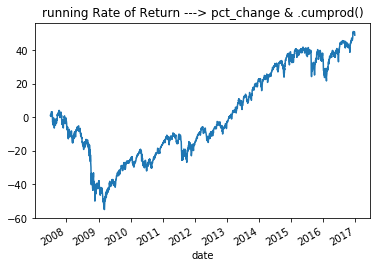

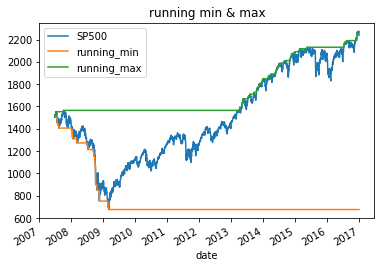

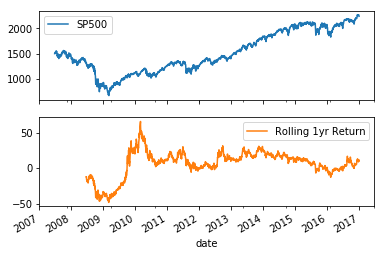

In [33]:
#vídeo

#Expanding Windows in pandas
# .expanding()
# .cumsum() ; .cumprod() ; cummin() ; cummax()

data = pd.read_csv(data_folder + 'sp500.csv', index_col=0, parse_dates=True)

# running Rate of Return
pr = data['SP500'].pct_change()

# add(1), cumprod, sub(1), mul(100)
pr.add(1).cumprod().sub(1).mul(100).plot()

plt.title("running Rate of Return ---> pct_change & .cumprod()")
plt.show()
print("================================================================")


# getting the running min & max
data['running_min'] = data['SP500'].expanding().min()
data['running_max'] = data['SP500'].expanding().max()
data.plot()
plt.title("running min & max")
plt.show()
print("================================================================")


# Rolling Annual Rate of Return
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

data = pd.read_csv(data_folder + 'sp500.csv', index_col=0, parse_dates=True)

pr = data['SP500'].pct_change()

r = pr.rolling('360D').apply(multi_period_return, raw=True)

data['Rolling 1yr Return'] = r*100

data.plot(subplots=True)
plt.show()


Exercício 6

In [34]:
# # Cumulative sum vs .diff()

# # The cumulative sum method has in fact the opposite effect of the .diff() method 

# data = pd.read_csv(data_folder + "google.csv", index_col='Date', parse_dates=True).dropna()

# # Calculate differences
# differences = data.diff()

# # Select start price
# start_price = data.first('D')

# # Calculate cumulative sum
# cumulative_sum = start_price.append(differences).cumsum()

# # Validate cumulative sum equals data
# print(data.equals(cumulative_sum))
# print("??")

Exercício 7

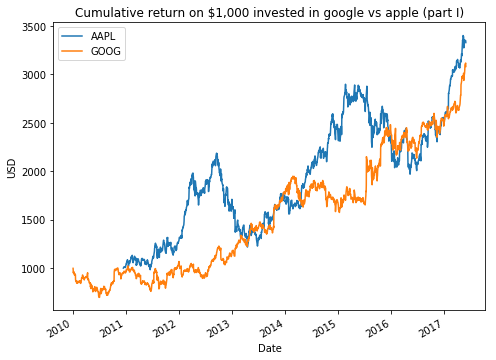

In [35]:
# Cumulative return on $1,000 invested in google vs apple I

data = pd.read_csv(data_folder + "apple_google.csv", index_col='Date', parse_dates=True)

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.ylabel("USD")
plt.title("Cumulative return on $1,000 invested in google vs apple (part I)")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so switching between the two stocks might have yielded an even better result.

Exercício 8

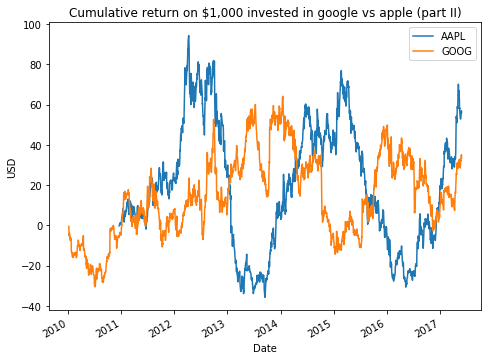

In [36]:
# Cumulative return on $1,000 invested in google vs apple II

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return, raw=False)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.ylabel("USD")
plt.title("Cumulative return on $1,000 invested in google vs apple (part II)")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 9 - Case study: S&P500 price simulation

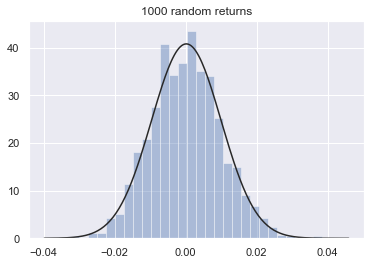

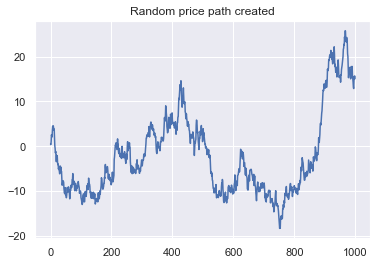

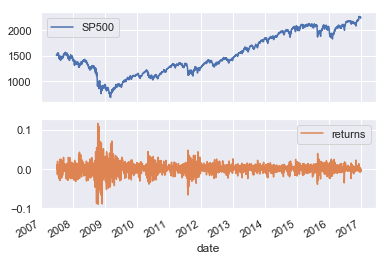

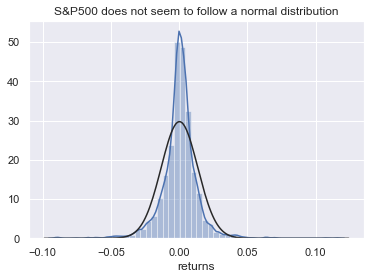

random choice of SP500 pct_change()
date
2007-07-02    0.005007
2007-07-03    0.040729
2007-07-05   -0.000322
2007-07-06   -0.008404
2007-07-09    0.002119
dtype: float64
start with the first value of the SP500 data
date
2007-06-29    1503.350000
2007-07-02       1.005007
2007-07-03       1.040729
2007-07-05       0.999678
2007-07-06       0.991596
dtype: float64


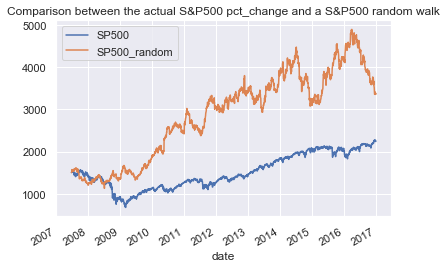

In [61]:
#vídeo

from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
sns.set()

seed(42)

random_returns = np.random.normal(loc=0, scale=0.01, size=1000)
sns.distplot(random_returns, fit=norm, kde=False)
plt.title("1000 random returns")
plt.show()

# Create a random price path
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()
plt.title("Random price path created")
plt.show()
print("======================================================")


# S&P 500 Prices and Returns
data = pd.read_csv(data_folder + 'sp500.csv', index_col=0, parse_dates=True)

data['returns'] = data['SP500'].pct_change()
data.plot(subplots=True)
plt.show()

# S&P 500 return distribution
sns.distplot(data['returns'].dropna(), fit=norm)
plt.title("S&P500 does not seem to follow a normal distribution")
plt.show()
print("======================================================")


# Generate Random S&P500 returns

from numpy.random import choice

data = pd.read_csv(data_folder + 'sp500.csv', index_col=0, parse_dates=True)
data['returns'] = data['SP500'].pct_change()

# generate random percentage changes from the S&P500 data (choice: com reposição)
sample = data['returns'].dropna()
n_obs = data['returns'].count()
random_walk = np.random.choice(sample, size=n_obs)
random_walk = pd.Series(random_walk, index=sample.index)
print("random choice of SP500 pct_change()")
print(random_walk.head())
print("======================================================")

# add a starting value: the first day of the data, e adicionar 1 às percentagens seguintes para criar uma sequência
start = data['SP500'].first('D')

sp500_random = start.append(random_walk.add(1))
print("start with the first value of the SP500 data")
print(sp500_random.head())
print("======================================================")

# Random S&P500 prices
data['SP500_random'] = sp500_random.cumprod()

# plot
data[['SP500', 'SP500_random']].plot()
plt.title("Comparison between the actual S&P500 pct_change and a S&P500 random walk")
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 10

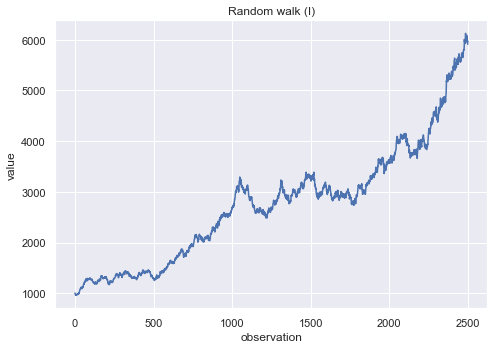

In [38]:
# Random walk I

# Set seed here
seed = 42

# Create random_walk
random_walk = np.random.normal(loc=0.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()

plt.title("Random walk (I)")
plt.xlabel("observation")
plt.ylabel("value")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 11

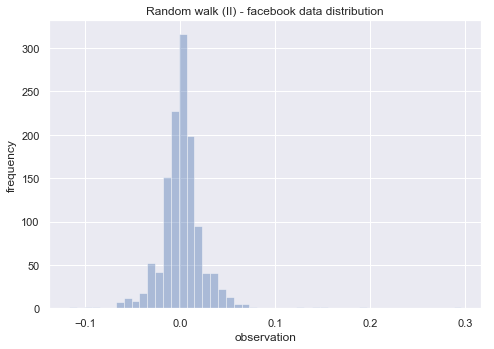

In [39]:
# Random walk II

# read csv into Series ---> squeeze=True
fb = pd.read_csv(data_folder + "fb.csv", index_col=0, parse_dates=True, header=-1, squeeze=True)        # Series
fb.index.name = 'date'

##############################################################################################################

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = np.random.choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk, kde=False)

plt.title("Random walk (II) - facebook data distribution")
plt.xlabel("observation")
plt.ylabel("frequency")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


Exercício 12

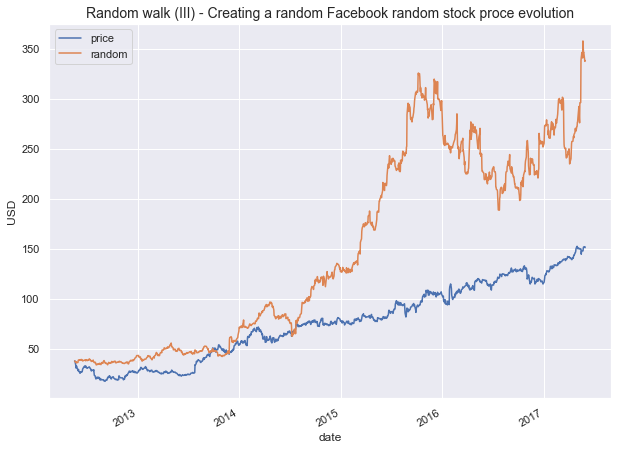

In [40]:
# Random walk III

random_walk    # random sample of daily FB returns as pd.Series ---> definido previamente

fb = pd.read_csv(data_folder + "fb.csv", index_col=0, parse_dates=True, header=-1)   # DataFrame    
fb.index.name = 'date'
fb.columns = ['price']
######################################################################################

# Select fb start price here
start = fb['price'].first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()
random_price.index = fb.index 

# Insert into fb and plot
fb['random'] = random_price

fb.plot()
plt.title("Random walk (III) - Creating a random Facebook random stock proce evolution", fontsize=14)
plt.xlabel("date")
plt.ylabel("USD")
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=1, wspace=0, hspace=0)
plt.show()


#### Exercício 13 - Relationships between time series: correlation

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


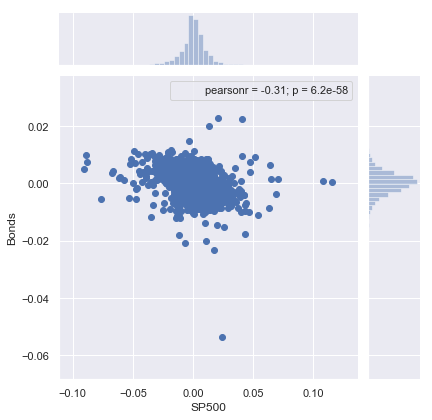

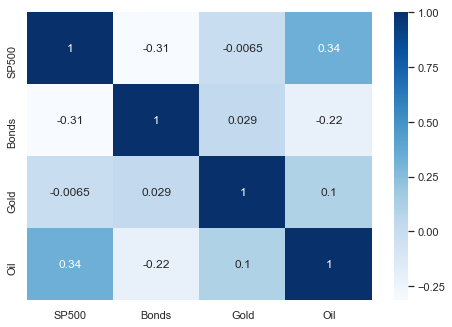

In [62]:
#vídeo

data = pd.read_csv(data_folder + "asset_classes.csv", index_col=0, parse_dates=True)

daily_returns = data.pct_change()

import scipy.stats as stats

j = sns.jointplot(x='SP500', y='Bonds', data=daily_returns)
j.annotate(stats.pearsonr)
plt.show()

# Calculate correlations
correlations = daily_returns.corr()
correlations

# Visualize all correlations with seaborn
sns.heatmap(correlations, annot=True, cmap="Blues")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


Exercício 14

          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


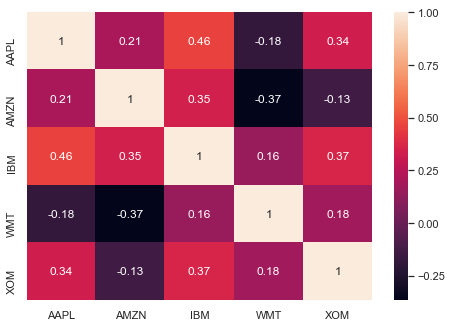

In [42]:
# Annual return correlations among several stocks

data = pd.read_csv(data_folder + "5_stocks.csv", index_col=0, parse_dates=True)

# Inspect data here
# print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Chapter 4 - Putting it all together: Building a value-weighted index

#### Exercício 1 - Select index components & import data

In [43]:
%%script false
#vídeo

nyse = pd.read_excel(data_folder + "listings.xlsx", sheet_name='nyse', na_values='n/a')
nyse.info()

nyse.set_index('Stock Symbol', inplace=True)
nyse.dropna(subset=['Sector'], inplace=True)
nyse['Market Capitalization'] /= 1e6   # express the values in millions of dollars  ---> /= para ficar, inplace

print("==========================================================")

# Index components
components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)
components.sort_values(ascending=False)

print("==========================================================")

tickers = components.index.get_level_values('Stock Symbol')
tickers.tolist()

columns = ['Company Name', 'Market Capitalization', 'Last Sale']

component_info = nyse.loc[tickers, columns]

pd.options.display.float_format = '{:, .2f}'.format

data = pd.read_csv(data_folder + 'stock_data.csv', index_col=0, parse_dates=True).loc[:, tickers.tolist()]


Couldn't find program: 'false'


Exercício 2

In [44]:
# Explore and clean company listing information ----> vou usar a nyse apenas, para n estar a juntar todas as sheets

listings = pd.read_excel(data_folder + "listings.xlsx", sheet_name='nyse', na_values='n/a')
##################################################################################################

# Inspect listings
print(listings.info())
print("===========================================================")

# Move the column 'Stock Symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())
print("===========================================================")

# Show the number of companies per sector
print(listings.groupby(['Sector']).size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, WBAI to ZTO
Data columns (total 6 columns):
Company Name             967 non-null object
Last Sale                967 non-null float64
Market Capitalization    967 non-null float64
IPO Year                 967 non-null float64
Sector                   967 non-null object
Industry                 967 non-null object
dtypes: float64(3), object(3)
memory usage: 52.9+ KB
None
Sector
Consumer Services        240
Finance                  132
Energy      

Exercício 3

In [45]:
%%script false
# Select and inspect index components

# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))  # erro

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Couldn't find program: 'false'


Exercício 4

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


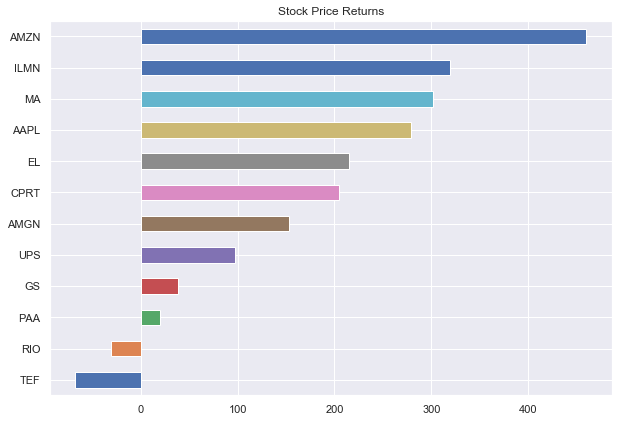

In [46]:
# Import index component price information

# Import prices and inspect result
stock_prices = pd.read_csv(data_folder + 'stock_data.csv', index_col='Date', parse_dates=True)
print(stock_prices.info())
print("=============================================================")

# Calculate the returns    
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh')

plt.title("Stock Price Returns")
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 5 - Build a market-cap weighted index

In [47]:
#vídeo

Exercício 6

In [48]:
%%script false
# Calculate number of shares outstanding

# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

Couldn't find program: 'false'


Exercício 7

In [49]:
%%script false
# Create time series of market value

# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

Couldn't find program: 'false'


Exercício 8

In [50]:
%%script false
# Calculate & plot the composite index

# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

Couldn't find program: 'false'


#### Exercício 9 - Evaluate index performance

In [51]:
#vídeo

Exercício 10

In [52]:
%%script false
# Calculate the contribution of each stock to the index

# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

Couldn't find program: 'false'


Exercício 11

In [53]:
%%script false
# Compare index performance against benchmark I

# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()

Couldn't find program: 'false'


Exercício 12

In [54]:
%%script false
# Compare index performance against benchmark II

# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

Couldn't find program: 'false'


#### Exercício 13 - Index correlation and exporting to excel

In [55]:
#vídeo

Exercício 14

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


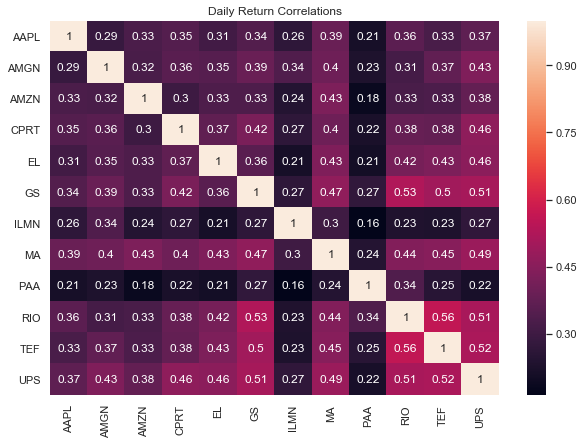

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
AAPL,1.000000,0.286898,0.327611,0.346616,0.306770,0.344981,0.264791,0.391421,0.212960,0.361684,0.325309,0.366039
AMGN,0.286898,1.000000,0.323408,0.355892,0.349893,0.390076,0.336927,0.400230,0.229255,0.313878,0.374555,0.432468
AMZN,0.327611,0.323408,1.000000,0.298929,0.334031,0.333402,0.242726,0.428330,0.182438,0.326229,0.331867,0.378399
CPRT,0.346616,0.355892,0.298929,1.000000,0.371763,0.423160,0.265665,0.401352,0.221273,0.384944,0.376767,0.462716
EL,0.306770,0.349893,0.334031,0.371763,1.000000,0.358318,0.214027,0.431556,0.206056,0.415416,0.428925,0.456952
GS,0.344981,0.390076,0.333402,0.423160,0.358318,1.000000,0.266063,0.466796,0.271982,0.527298,0.498230,0.506407
ILMN,0.264791,0.336927,0.242726,0.265665,0.214027,0.266063,1.000000,0.301392,0.162796,0.234445,0.231173,0.267801
MA,0.391421,0.400230,0.428330,0.401352,0.431556,0.466796,0.301392,1.000000,0.243761,0.437778,0.448438,0.486512
PAA,0.212960,0.229255,0.182438,0.221273,0.206056,0.271982,0.162796,0.243761,1.000000,0.337448,0.253598,0.217523
RIO,0.361684,0.313878,0.326229,0.384944,0.415416,0.527298,0.234445,0.437778,0.337448,1.000000,0.559264,0.509809


In [56]:
# Visualize your index constituent correlations

stock_prices = pd.read_csv(data_folder + "stock_data.csv", index_col='Date', parse_dates=True)

# Inspect stock_prices here
print(stock_prices.info())
print("=========================================================")

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.subplots_adjust(left=0, bottom=-0.3, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

correlations

Exercício 15

In [57]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 04FE-F067

 Directory of C:\Users\Admin\Dropbox\Python\Jupyter Notebook files\DataCamp

28/03/2019  23:49    <DIR>          .
28/03/2019  23:49    <DIR>          ..
26/03/2019  12:43    <DIR>          .ipynb_checkpoints
28/03/2019  23:48           776 192 data.xls
26/03/2019  12:41           164 141 DataCamp - Cleaning Data in Python.ipynb
26/03/2019  12:09         7 780 413 DataCamp - Data Types for Data Science.ipynb
25/03/2019  12:12           200 328 DataCamp - Importing Data in Python (Part 1).ipynb
25/03/2019  12:12           106 932 DataCamp - Importing Data in Python (Part 2).ipynb
19/02/2019  11:42           846 356 DataCamp - Intermediate Python.ipynb
10/03/2019  17:48         3 630 900 DataCamp - Introduction to Data Visualization.ipynb
26/03/2019  12:28           349 908 DataCamp - Introduction to Databases in Python.ipynb
17/02/2019  17:13           167 667 DataCamp - Introduction to Python.ipynb
26/03/2019  21:06  

In [58]:
# Save your analysis to multiple excel worksheets

# stock prices dataframe
stock_prices = pd.read_csv(data_folder + "stock_data.csv", index_col='Date', parse_dates=True)

# index dataframe
index = pd.read_csv(data_folder + "index.csv", index_col=0, parse_dates=True)
index.columns = ['Index']

###################################################################################################

# Inspect index and stock_prices
print(index.info())
print("========================================================")
print(stock_prices.info())
print("========================================================")

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

######################################################

# Create index & stock price returns
returns = data.pct_change()

# export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
Index    1761 non-null float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
AAPL     1761 non-null float64
AMGN     1761 non-null float64
AMZN     1761 non-null float64
CPRT     1761 non-null float64
EL       1762 non

#### Exercício 16 - end

In [59]:
#vídeo

# Fim